In [194]:
import pandas as pd
from imp import reload
from utils import util
reload(util)

<module 'utils.util' from '/Users/wanjun/Desktop/比赛训练营/Kaggle-量化比赛/code/src/utils/util.py'>

In [195]:
# 加载 book 数据和 trade 数据
book0 = util.load_book(0)
trade0 = util.load_trade(0)
book0 = util.feature_row(book0)


In [197]:
fe0 = util.gen_data(0)

/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-inde

In [173]:
# 加载标签数据
label = pd.read_csv('../data/train.csv')
label = label[label.stock_id==0]
label = label.sort_values('time_id').target

In [174]:
col_name_book = book0.columns.tolist()
col_name_trade = ['price', 'size', 'order_count', 'seconds_in_bucket']

In [176]:
util.feature_row(book0)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,book_wap1,book_wap2,book_wap_mean,book_wap_diff,book_price_spread,book_bid_spread,book_ask_spread,book_total_volume,book_volume_imbalance
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0,1.001434,1.001390,1.001412,0.000044,0.000439,0.000052,-0.000052,331,321
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0,1.001448,1.001390,1.001419,0.000058,0.000439,0.000052,-0.000052,205,195
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0,1.001448,1.001391,1.001419,0.000057,0.000439,0.000052,-0.000103,205,195
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,1.001391,1.001417,0.000052,0.000439,0.000052,-0.000103,231,221
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,1.001391,1.001417,0.000052,0.000439,0.000052,-0.000103,231,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28,0,0.998515,0.998522,0.998519,-0.000008,0.000240,0.000479,-0.000192,256,-20
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28,0,0.998516,0.998817,0.998666,-0.000300,0.000240,0.000383,-0.000192,409,-173
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28,0,0.998516,0.998715,0.998616,-0.000199,0.000240,0.000383,-0.000192,309,-73
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28,0,0.998517,0.998715,0.998616,-0.000198,0.000240,0.000383,-0.000192,310,-74


In [15]:
from tsfresh import extract_features
book0 = book0.reset_index()
extracted_features_book = extract_features(book0, column_id="time_id", column_sort="index")

Feature Extraction: 100%|██████████| 20/20 [19:22<00:00, 58.10s/it]  


In [34]:
#特征筛选
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import feature_extraction

impute(extracted_features_book)
features_filtered_book = select_features(extracted_features_book.reset_index(drop=True), label)
feature_param_book = feature_extraction.settings.from_columns(features_filtered_book)

In [37]:
len(features_filtered_book.columns)

2490

In [38]:
features_filtered_book.to_csv('../data/features_filtered_book.csv')

In [71]:
trade0 = trade0.reset_index()
extracted_features_trade0 = extract_features(trade0[['time_id','index']+col_name_trade], column_id="time_id", column_sort="index")

Feature Extraction: 100%|██████████| 20/20 [04:31<00:00, 13.55s/it]


In [72]:
#特征筛选
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import feature_extraction

impute(extracted_features_trade0)
features_filtered_trade0 = select_features(extracted_features_trade0.reset_index(drop=True), label)
feature_param_trade = feature_extraction.settings.from_columns(features_filtered_trade0)

/Users/wanjun/anaconda/envs/python36/lib/python3.6/site-packages/tsfresh/utilities/dataframe_functions.py:172: RuntimeWarning: The columns ['order_count__fft_coefficient__attr_"real"__coeff_60'
 'order_count__fft_coefficient__attr_"real"__coeff_61'
 'order_count__fft_coefficient__attr_"real"__coeff_62'
 'order_count__fft_coefficient__attr_"real"__coeff_63'
 'order_count__fft_coefficient__attr_"real"__coeff_64'
 'order_count__fft_coefficient__attr_"real"__coeff_65'
 'order_count__fft_coefficient__attr_"real"__coeff_66'
 'order_count__fft_coefficient__attr_"real"__coeff_67'
 'order_count__fft_coefficient__attr_"real"__coeff_68'
 'order_count__fft_coefficient__attr_"real"__coeff_69'
 'order_count__fft_coefficient__attr_"real"__coeff_70'
 'order_count__fft_coefficient__attr_"real"__coeff_71'
 'order_count__fft_coefficient__attr_"real"__coeff_72'
 'order_count__fft_coefficient__attr_"real"__coeff_73'
 'order_count__fft_coefficient__attr_"real"__coeff_74'
 'order_count__fft_coefficient__attr

In [76]:
features_filtered_trade0.to_csv('../data/features_filtered_trade0.csv')

In [93]:
feature_all = features_filtered_book.merge(features_filtered_trade0,how='inner',left_index=True,right_index=True)

In [94]:
feature_all.to_csv('../data/feature_all.csv')

In [112]:
import numpy as np
np.save('../data/feature_param_trade.npy', feature_param_trade) 
np.save('../data/feature_param_book.npy', feature_param_book) 

In [117]:
import numpy as np
t = np.load('../data/feature_param_trade.npy',allow_pickle = True).item()

In [142]:
book0['log_return'] = book0.groupby(['time_id'])['book_wap1'].apply(util.log_return)
book0 = book0[~book0['log_return'].isnull()]
temp=  pd.DataFrame(book0.groupby(['time_id'])['log_return'].agg(util.realized_volatility)).reset_index()

In [149]:
label_res = label-temp.log_return

(array([1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 8.000e+00, 1.100e+01,
        1.400e+01, 2.500e+01, 2.500e+01, 4.500e+01, 6.800e+01, 1.010e+02,
        2.130e+02, 4.090e+02, 9.880e+02, 1.019e+03, 5.260e+02, 1.950e+02,
        7.200e+01, 3.500e+01, 6.000e+00, 1.100e+01, 7.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([-0.0231827 , -0.02248506, -0.02178741, -0.02108976, -0.02039212,
        -0.01969447, -0.01899682, -0.01829918, -0.01760153, -0.01690388,
        -0.01620623, -0.01550859, -0.01481094, -0.01411329, -0.01341565,
        -0.012718  , -0.01202035, -0.0113227 , -0.01062506, -0.00992741,
        -0.00922976, -0.00853212, -0.00783447, -0.00713682, -0.00643917,
        -0.

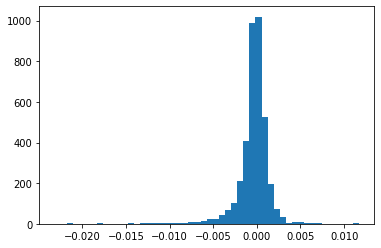

In [154]:
from matplotlib import pyplot as plt
plt.hist(label_res,bins=50)